#### Matplotlib has two interfaces. 
The first is an object-oriented (OO) interface. In this case, we utilize an instance of axes.Axes in order to render visualizations on an instance of figure.Figure.

The second is based on MATLAB and uses a state-based interface. This is encapsulated in the pyplot module. See the pyplot tutorials for a more in-depth look at the pyplot interface.

###### Most of the terms are straightforward but the main thing to remember is that:
The Figure is the final image that may contain 1 or more Axes.
The Axes represent an individual plot (don't confuse this with the word "axis", which refers to the x/y axis of a plot).

#### Axes

The Axes contains most of the figure elements: Axis, Tick, Line2D, Text, Polygon, etc., and sets the coordinate system.

This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via set via the set_xlim() and set_ylim() Axes methods). Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).



#### Axis  

These are the number line like objects. They take care of setting the graph limits
and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). 
The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. 
The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.



#### Artist
Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collection objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

**Using Artist objects to render on the canvas**

*There are three layers to the matplotlib API:*
    1. the matplotlib.backend_bases.FigureCanvas is the area onto which the figure is drawn
    2. the matplotlib.backend_bases.Renderer is the object which knows how to draw on the FigureCanvas
    3. and the matplotlib.artist.Artist is the object that knows how to use a renderer to paint onto the canvas. 
   

#### Types of inputs to plotting functions
All of plotting functions expect np.array or np.ma.masked_array as input. Classes that are 'array-like' such as pandas data objects and np.matrix may or may not work as intended. It is best to convert these to np.array objects prior to plotting.




In [1]:
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from matplotlib.pyplot import legend 
import matplotlib as mpl

In [2]:
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is

Text(0.5, 0.98, 'No axes on this figure')

<Figure size 432x288 with 0 Axes>

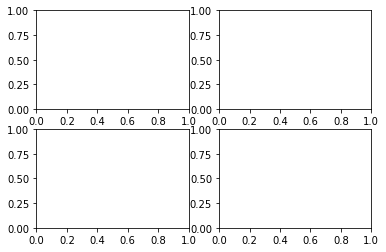

In [3]:
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
x = np.linspace(0, 2, 100)


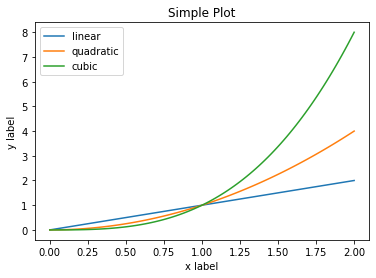

In [4]:
# state-based interface
plt.plot(x, x, label='linear', )
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")
plt.legend()

Text(0, 0.5, 'y label')

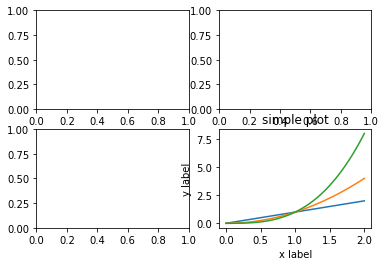

In [5]:
# object-oriented (OO) interface
fig, ax = plt.subplots(2, 2)

ax[1, 1].plot(x, x, label='linear', )
ax[1, 1].plot(x, x**2, label='quadratic')
ax[1, 1].plot(x, x**3, label='cubic')

ax[1, 1].set_title("simple plot")
ax[1, 1].set_xlabel('x label')
ax[1, 1].set_ylabel('y label')

#### Formatting the style of your plot

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot.



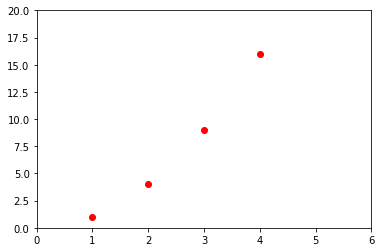

In [6]:
# The axis() command in the example above takes a list of [xmin, xmax, ymin, ymax] 
# and specifies the viewport of the axes.
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

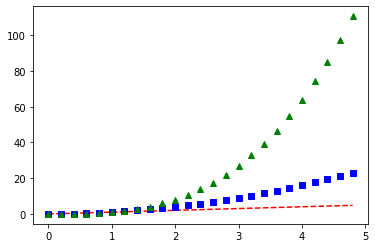

In [7]:
# plotting several lines with different format styles in one command using arrays.
#  evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

#### Plotting with keyword strings


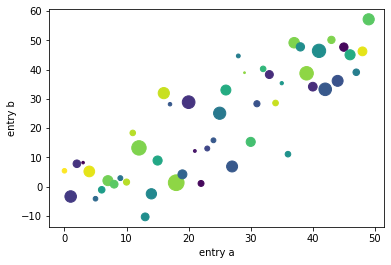

In [8]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

#### Plotting with categorical variables


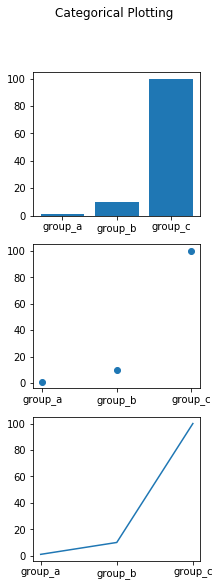

In [9]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(3, 9))

# Either a 3-digit integer or three separate integers describing the position of the subplot. 
# If the three integers are nrows, ncols, and index in order, the subplot 
# will take the index position on a grid with nrows rows and ncols columns. 
# index starts at 1 in the upper left corner and increases to the right.

plt.subplot(311)
plt.bar(names, values)

plt.subplot(312)
plt.scatter(names, values)

plt.subplot(313)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

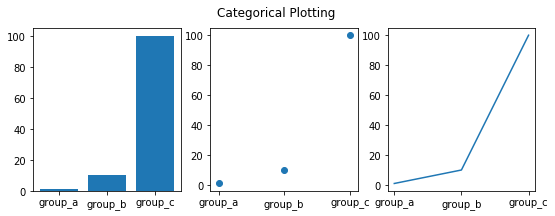

In [10]:
plt.figure(figsize=(9, 3))

# Either a 3-digit integer or three separate integers describing the position of the subplot. 
# If the three integers are nrows, ncols, and index in order, the subplot 
# will take the index position on a grid with nrows rows and ncols columns. 
# index starts at 1 in the upper left corner and increases to the right.

# 131 => One Row + 3 Columns + index 1
# 132 => One Row + 3 Columns + index 2
# 132 => One Row + 3 Columns + index 3

plt.subplot(131)
plt.bar(names, values)

plt.subplot(132)
plt.scatter(names, values)

plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

#### Annotating text
The uses of the basic text() command above place text at an arbitrary position on the Axes. A common use for text is to annotate some feature of the plot, and the annotate() method provides helper functionality to make annotations easy. In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. Both of these arguments are (x,y) tuples.

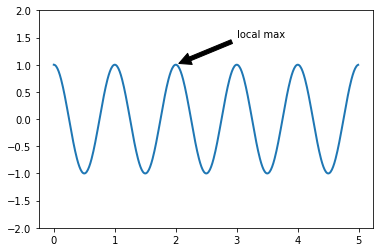

In [11]:
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)

line = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

#### Importing image data into Numpy arrays

In [ ]:
img = mpimg.imread('image.png')
print(img)

#### Customizing Matplotlib with style sheets and rcParams


In [ ]:
print(plt.style.available)

#### Defining your own style
 You can create custom styles and use them by calling style.use with the path or URL to the style sheet.
 
 **Example:** <br>
```axes.titlesize : 24  
axes.labelsize : 20 
lines.linewidth : 3 
lines.markersize : 10 
xtick.labelsize : 16 
ytick.labelsize : 16 ```


In [ ]:
>>> plt.style.use(['dark_background'])


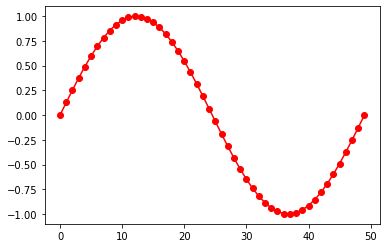

In [12]:
plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')

#### Controlling the legend entries
To Place a legend on the axes, we have 3 different ways.
    1. Automatic detection of elements to be shown in the legend
    2. Labeling existing plot elements
    3. Explicitly defining the elements in the legend


In [53]:
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

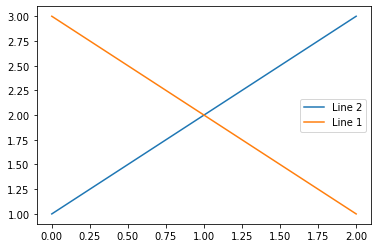

In [62]:
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend()

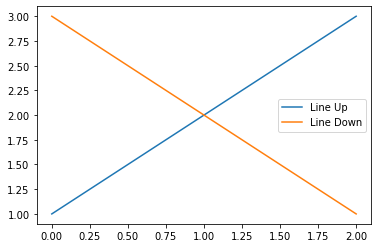

In [67]:
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
plt.legend([line_up, line_down], ['Line Up', 'Line Down'])

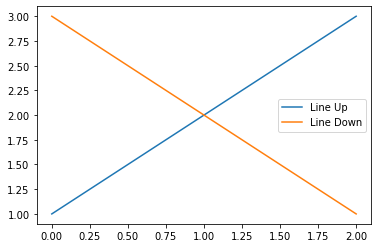

In [68]:
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
legend([line_up, line_down], ['Line Up', 'Line Down'])